### Carga de Datos
Este bloque importa los datos desde el archivo Excel. Asegura que el archivo esté en el mismo directorio del notebook con el nombre correcto.

### Carga de Datos desde Excel
- Este bloque carga los datos de la hoja 'Pedidos' del archivo Excel `Data_Set_Global.xlsx`.
- A partir de aquí se inicia el análisis de comportamiento de clientes.


In [1]:
# Carga de datos desde archivo Excel (una sola vez)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Cargar las hojas necesarias del archivo Excel
data_path = 'Data_Set_Global.xlsx'
pedidos = pd.read_excel(data_path, sheet_name='Pedidos')
productos = pd.read_excel(data_path, sheet_name='Productos')
clientes = pd.read_excel(data_path, sheet_name='Clientes')

### Consolidación del Dataset: Merges
- Se realiza el `merge` de los pedidos con los productos (`on='product_id'`) y luego con los clientes (`on='customer_id'`).
- Esto crea el DataFrame `data_completa`, necesario para análisis posteriores como limpieza, clustering y visualización.


In [2]:
# Unir las tablas pedidos, productos y clientes en un solo DataFrame consolidado
pedidos['product_id'] = pedidos['product_id'].astype(str)
productos['product_id'] = productos['product_id'].astype(str)
pedidos['customer_id'] = pedidos['customer_id'].astype(str)
clientes['customer_id'] = clientes['customer_id'].astype(str)

pedidos_productos = pedidos.merge(productos, on='product_id', how='left')
data_completa = pedidos_productos.merge(clientes, on='customer_id', how='left')

### Carga Consolidada de Datos desde Excel
- Este bloque importa una sola vez las tres hojas relevantes del archivo `Data_Set_Global.xlsx`:
  - `Pedidos`: detalles de cada orden.
  - `Productos`: información del artículo.
  - `Clientes`: perfil de cada cliente.
- Estas tablas serán combinadas más adelante para análisis completo.


1. Carga y revisión inicial de los datos

### Limpieza y Ajuste de Columnas del Dataset (EDA)
Se renombran columnas para quitar sufijos _x tras los merges.

Se eliminan columnas irrelevantes para el análisis, como datos personales, identificadores y fechas.

Deja el dataset listo con solo las variables útiles para clustering y visualización.

In [3]:
# Limpieza y ajuste de nombres de columnas tras merge
data_completa = data_completa.rename(columns={
    'customer_name_x': 'customer_name',
    'gender_x': 'gender',
    'product_name_x': 'product_name',
    'customer_segment_x': 'customer_segment',
    'area_x': 'area'
})

# Eliminar columnas irrelevantes para análisis
cols_to_drop = [
    'order_id', 'email', 'phone', 'address', 'pincode', 'order_date',
    'registration_date', 'payment_method', 'delivery_status', 'delivery_partner_id',
    'store_id', 'customer_name', 'first_name'
]
data_completa.drop(columns=cols_to_drop, inplace=True)

# Confirmar columnas finales
print('Columnas restantes:', data_completa.columns.tolist())

Columnas restantes: ['product_id', 'quantity', 'unit_price', 'customer_id', 'promised_delivery_time', 'actual_delivery_time', 'order_total', 'area', 'customer_segment', 'total_orders', 'avg_order_value', 'gender', 'product_name', 'mrp', 'margin_percentage', 'shelf_life_days', 'min_stock_level', 'max_stock_level', 'product_name_y', 'price', 'brand', 'category', 'customer_name_y', 'gender_y', 'area_y', 'customer_segment_y']


1.1 Realizar Merges

### Unión de Pedidos con Productos y Clientes
- Se combinan los datos de pedidos con la información de productos y luego con la de clientes.
- Esto permite enriquecer el dataset final `data_completa` con información relevante para el análisis: marcas, categorías, género del cliente, etc.


In [4]:
pedidos['product_id'] = pedidos['product_id'].astype(str)
productos['product_id'] = productos['product_id'].astype(str)
pedidos['customer_id'] = pedidos['customer_id'].astype(str)
clientes['customer_id'] = clientes['customer_id'].astype(str)

pedidos_productos = pedidos.merge(productos, on='product_id', how='left')

pedidos_clientes = pedidos.merge(clientes, on='customer_id', how='left')

data_completa = pedidos_productos.merge(clientes, on='customer_id', how='left')

columnas_a_eliminar = [col for col in data_completa.columns if col.endswith('_y')]
data_completa = data_completa.drop(columns=columnas_a_eliminar)

print(data_completa.head())
print("Columnas finales en data_completa:", data_completa.columns)

     order_id product_id  quantity  unit_price customer_id  \
0  1961864118     642612         3      517.03    30065862   
1  1549769649     378676         1      881.42     9573071   
2  9185164487     741341         2      923.84    45477575   
3  9644738826     561860         1      874.78    88067569   
4  5427684290     602241         2      976.55    83298567   

           order_date promised_delivery_time actual_delivery_time  \
0 2024-07-17 08:34:01    2024-07-17 08:52:01  2024-07-17 08:47:01   
1 2024-05-28 13:14:29    2024-05-28 13:25:29  2024-05-28 13:27:29   
2 2024-09-23 13:07:12    2024-09-23 13:25:12  2024-09-23 13:29:12   
3 2023-11-24 16:16:56    2023-11-24 16:34:56  2023-11-24 16:33:56   
4 2023-11-20 05:00:39    2023-11-20 05:17:39  2023-11-20 05:18:39   

  delivery_status  order_total  ... gender_x  product_name_x      mrp  \
0         On Time      3197.07  ...   Female      Pet Treats   795.43   
1         On Time       976.55  ...     Male    Orange Juice  1259

2. Limpieza de datos

### Limpieza de datos
Verifica valores nulos en cada columna (isnull().sum()).

Muestra los tipos de datos de todas las columnas (dtypes).

Cuenta cuántos registros duplicados hay en el dataset (duplicated().sum()).

In [5]:
print(data_completa.isnull().sum())

print(data_completa.dtypes)

print(f"Duplicados: {data_completa.duplicated().sum()}")

order_id                  0
product_id                0
quantity                  0
unit_price                0
customer_id               0
order_date                0
promised_delivery_time    0
actual_delivery_time      0
delivery_status           0
order_total               0
payment_method            0
delivery_partner_id       0
store_id                  0
customer_name_x           0
email                     0
phone                     0
address                   0
area_x                    0
pincode                   0
registration_date         0
customer_segment_x        0
total_orders              0
avg_order_value           0
first_name                0
gender_x                  0
product_name_x            0
mrp                       0
margin_percentage         0
shelf_life_days           0
min_stock_level           0
max_stock_level           0
price                     0
brand                     0
category                  0
dtype: int64
order_id                           

3. Análisis de pedidos

### Análisis de pedidos
El histograma muestra cómo se distribuyen los precios unitarios.

El gráfico de barras indica la cantidad de pedidos por estado de entrega.

Permite detectar rangos de precio comunes y posibles problemas logísticos.


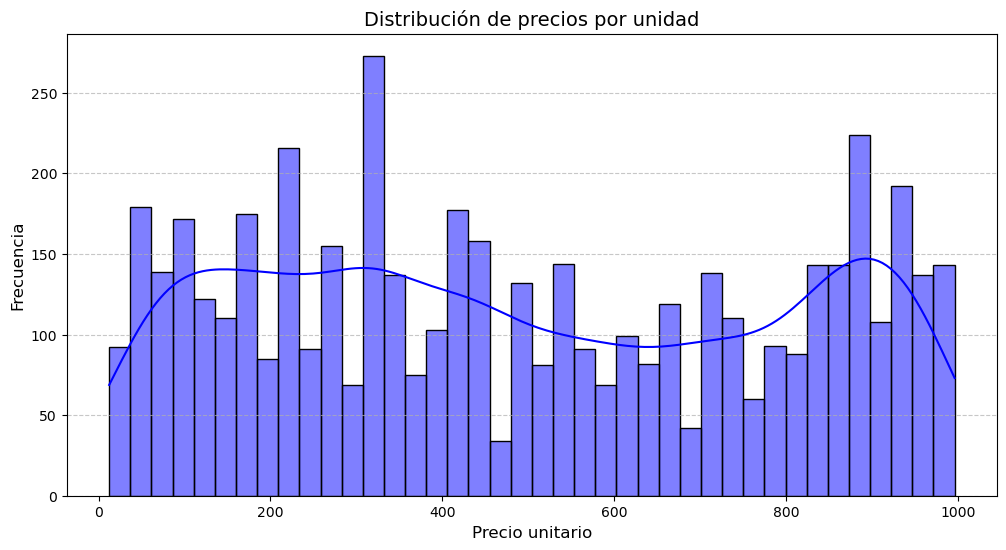

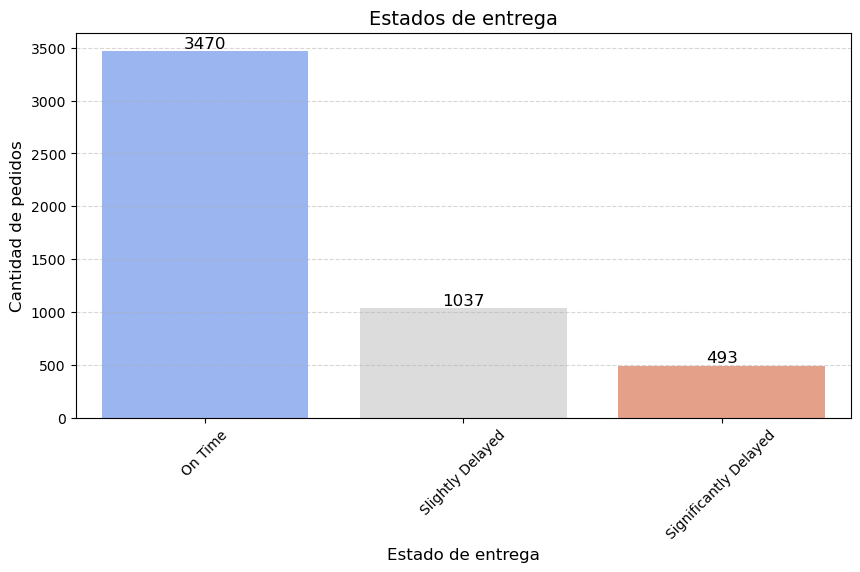

In [6]:
plt.figure(figsize=(12, 6))
sns.histplot(pedidos['unit_price'], bins=40, kde=True, color="blue")

plt.title("Distribución de precios por unidad", fontsize=14)
plt.xlabel("Precio unitario", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(10, 5))
ax = sns.countplot(x='delivery_status', data=pedidos, palette="coolwarm", order=pedidos['delivery_status'].value_counts().index)

plt.title("Estados de entrega", fontsize=14)
plt.xlabel("Estado de entrega", fontsize=12)
plt.ylabel("Cantidad de pedidos", fontsize=12)

for container in ax.containers:
    ax.bar_label(container, fmt="%d", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

4. Procesamiento de Fechas de Entrega y Codificación de Producto

### Procesamiento de Fechas de Entrega y Codificación de Producto
Convierte fechas de entrega a formato datetime y calcula el retraso en horas (delivery_time_gap).

Los valores negativos (entregas anticipadas) se ajustan a cero.

Extrae una categoría de producto desde el nombre (product_name_x) y la codifica numéricamente (product_cat_encoded), útil para clustering o modelos.


In [8]:
# Procesamiento robusto de fechas y codificación de producto
import pandas as pd
# Asegurar formatos de fecha
data_completa['promised_delivery_time'] = pd.to_datetime(data_completa['promised_delivery_time'])
data_completa['actual_delivery_time'] = pd.to_datetime(data_completa['actual_delivery_time'])
# Calcular diferencia en horas
data_completa['delivery_time_gap'] = (data_completa['actual_delivery_time'] - data_completa['promised_delivery_time']).dt.total_seconds() / 3600
data_completa['delivery_time_gap'] = data_completa['delivery_time_gap'].clip(lower=0)
# Codificar categoría de producto desde el nombre
if 'product_name_x' in data_completa.columns:
    data_completa['product_category'] = data_completa['product_name_x'].str.extract(r'(\w+)')[0].astype('category')
    data_completa['product_cat_encoded'] = data_completa['product_category'].cat.codes
else:
    print("❌ La columna 'product_name_x' no está presente en el DataFrame.")


5. Análisis de Clientes

### Análisis de Clientes
Agrupa a los clientes según cuántos pedidos han realizado (order_id).

Clasifica la frecuencia de compra en tres segmentos: Ocasional, Regular y Frecuente, usando qcut.

El gráfico muestra cuántos clientes hay en cada grupo, útil para estrategias de fidelización y marketing.


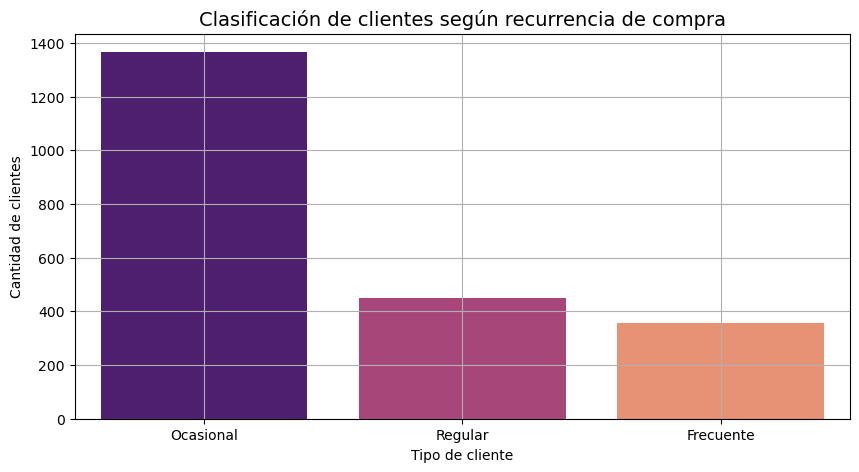

In [9]:
frecuencia_clientes = data_completa.groupby('customer_id')['order_id'].count().reset_index()
frecuencia_clientes['segmento_frecuencia'] = pd.qcut(frecuencia_clientes['order_id'], q=3, labels=["Ocasional", "Regular", "Frecuente"])

plt.figure(figsize=(10, 5))
sns.countplot(x='segmento_frecuencia', data=frecuencia_clientes, palette="magma")
plt.title("Clasificación de clientes según recurrencia de compra", fontsize=14)
plt.xlabel("Tipo de cliente")
plt.ylabel("Cantidad de clientes")
plt.grid()
plt.show()

5.2 Relación entre volumen de compra y gasto

### Relación entre volumen de compra y gasto
Agrupa los productos por nombre y suma el total gastado en cada uno (order_total).

Ordena y selecciona los 20 productos con mayor gasto acumulado.

El gráfico muestra visualmente en qué productos se concentra el mayor gasto, útil para decisiones comerciales y de inventario.




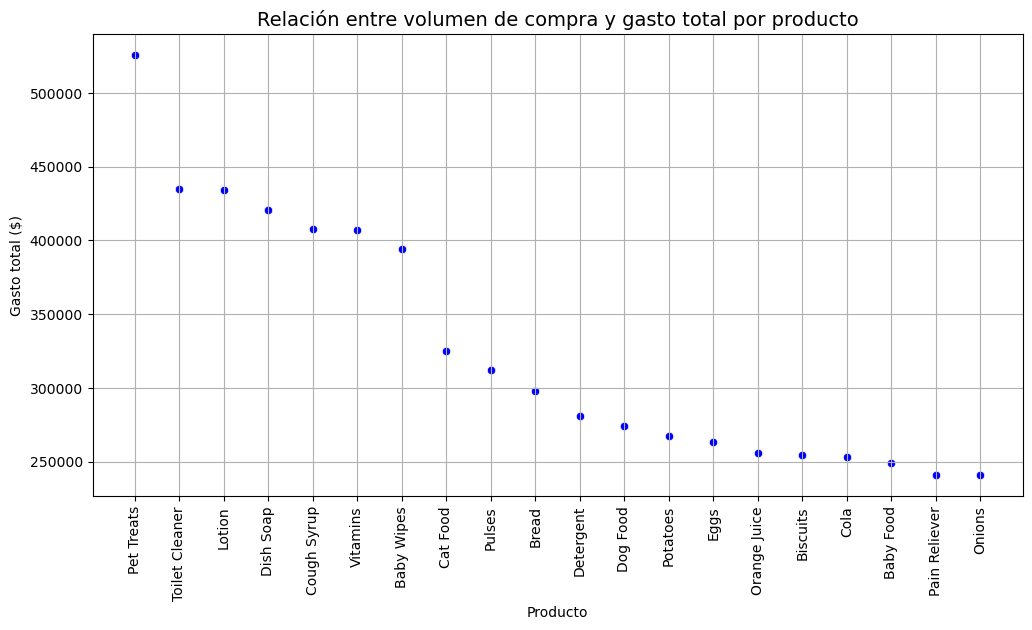

In [10]:
productos_gasto = data_completa.groupby('product_name_x')['order_total'].sum().reset_index()
productos_gasto = productos_gasto.sort_values(by='order_total', ascending=False).head(20)

plt.figure(figsize=(12, 6))
ax = sns.scatterplot(x=productos_gasto['product_name_x'], y=productos_gasto['order_total'], color="blue")
plt.xticks(rotation=90)
plt.title("Relación entre volumen de compra y gasto total por producto", fontsize=14)
plt.xlabel("Producto")
plt.ylabel("Gasto total ($)")
plt.grid()
plt.show()

### Interpretación del gráfico
El mayor gasto se concentra en pocos productos como Pet Treats y Toilet Cleaner.

La curva decreciente muestra que unos pocos artículos generan la mayor parte de los ingresos.

5.3 Impacto de categorías en el consumo y gasto

### Impacto de categorías en el consumo y gasto
Agrupa los datos por categoría de producto y suma tanto la cantidad vendida como el gasto total.

Ordena las categorías según el gasto y grafica una línea del gasto acumulado por categoría.

Permite identificar qué categorías generan más ingresos y son más relevantes comercialmente.


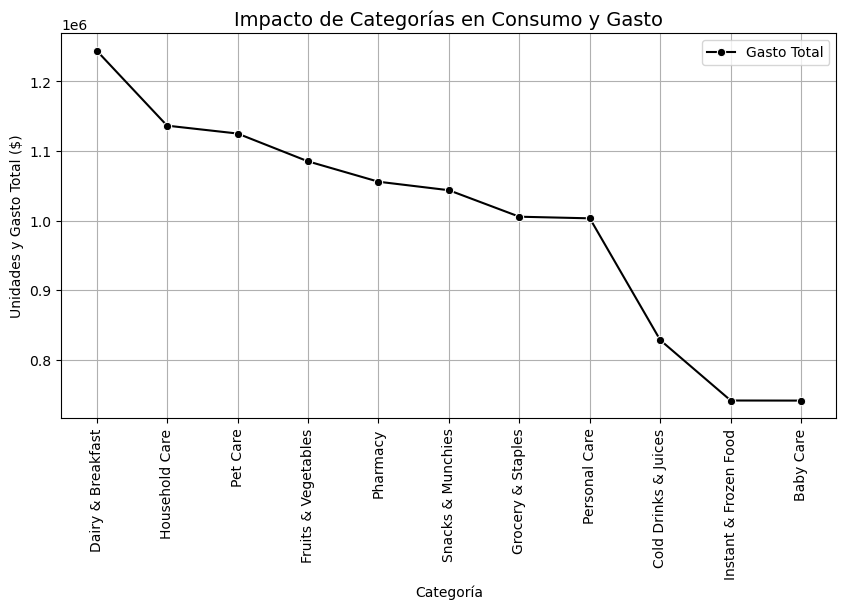

In [11]:
categorias_gasto = data_completa.groupby('category')[['quantity', 'order_total']].sum().reset_index()
categorias_gasto = categorias_gasto.sort_values(by='order_total', ascending=False)

plt.figure(figsize=(10, 5))
sns.lineplot(x='category', y='order_total', data=categorias_gasto, marker="o", color="black", label="Gasto Total")

plt.xticks(rotation=90)
plt.title("Impacto de Categorías en Consumo y Gasto", fontsize=14)
plt.xlabel("Categoría")
plt.ylabel("Unidades y Gasto Total ($)")
plt.legend()
plt.grid()

plt.show()

### Interpretación del gráfico
"Dairy & Breakfast" es la categoría con mayor gasto total, seguida por "Household Care" y "Pet Care".

A partir de "Personal Care", el gasto desciende con fuerza, siendo "Cold Drinks & Juices", "Frozen Food" y "Baby Care" las categorías con menor contribución al gasto.

La curva muestra una distribución desigual del consumo: pocas categorías concentran la mayor parte del gasto.

Esto sugiere oportunidades para optimizar portafolio y enfocar estrategias de marketing en categorías de mayor impacto.


5.4 Segmentación de clientes según historial de compras

### Segmentación de clientes según historial de compras
Agrupa los clientes según la cantidad de pedidos realizados (order_id).

Clasifica en 3 grupos usando qcut:
Bajo consumo, Moderado y Alto consumo.

El gráfico muestra cuántos clientes pertenecen a cada segmento, útil para personalizar estrategias de retención o fidelización.


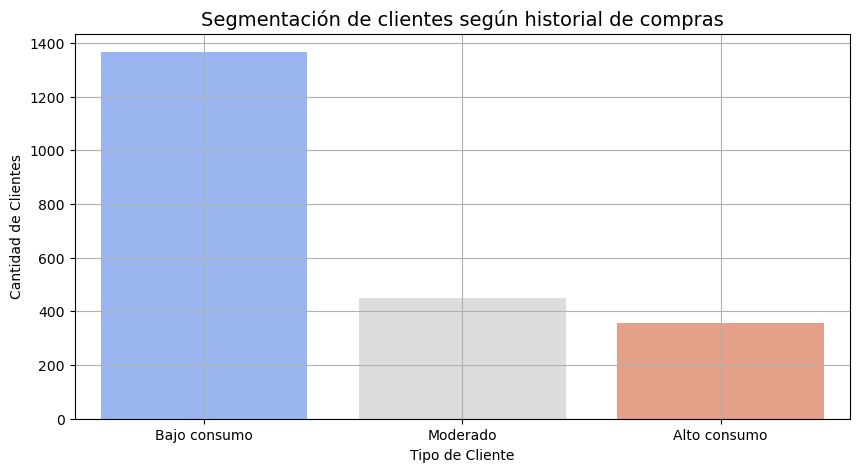

In [12]:
historial_compras = data_completa.groupby('customer_id')['order_id'].count().reset_index()
historial_compras['categoria_historial'] = pd.qcut(historial_compras['order_id'], q=3, labels=["Bajo consumo", "Moderado", "Alto consumo"])

plt.figure(figsize=(10, 5))
sns.countplot(x='categoria_historial', data=historial_compras, palette="coolwarm")
plt.title("Segmentación de clientes según historial de compras", fontsize=14)
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Clientes")
plt.grid()
plt.show()

### Interpretación del gráfico
La mayoría de los clientes (1,370) pertenecen al segmento de bajo consumo.

Solo una pequeña proporción muestra un historial de compra alto (menos de 400 clientes).

Esto sugiere que la base de clientes es amplia pero con poca frecuencia de compra, lo que abre oportunidades para estrategias de reactivación y fidelización.


5.5 Relación entre cantidad de unidades compradas y gasto total

### Interpretación del gráfico: Segmentación por Historial de Compras
La mayoría de los clientes (≈ 1,380) están en el segmento de bajo consumo, es decir, hacen pocas compras.

Solo una minoría cae en el grupo de alto consumo (≈ 350), quienes representan a los compradores más recurrentes.

Este patrón indica una base amplia de clientes ocasionales y un grupo más reducido de clientes fieles, valioso para estrategias de retención y programas de fidelización.


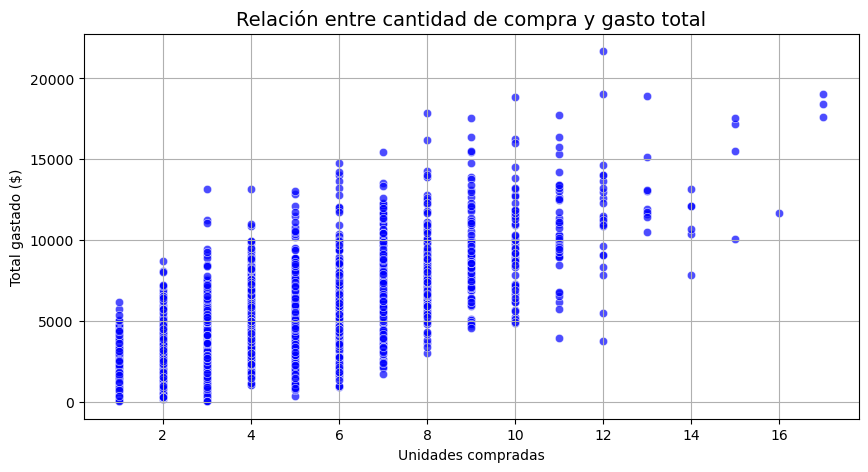

In [13]:
clientes_gasto_cantidad = data_completa.groupby('customer_id')[['order_total', 'quantity']].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='quantity', y='order_total', data=clientes_gasto_cantidad, color="blue", alpha=0.7)
plt.title("Relación entre cantidad de compra y gasto total", fontsize=14)
plt.xlabel("Unidades compradas")
plt.ylabel("Total gastado ($)")
plt.grid()
plt.show()

### Interpretación del gráfico
Existe una tendencia positiva clara: a mayor cantidad de unidades compradas, mayor es el gasto total.

Sin embargo, la dispersión sugiere que algunos clientes pueden gastar mucho con pocas unidades (probablemente por productos de alto precio).

El gráfico permite identificar patrones de valor por volumen y posibles compradores de productos premium o en grandes cantidades.

6.1 Creación de Variables Derivadas

### Codificación de Producto y Categoría + Cálculo de Retraso en Entrega
Se crean variables codificadas para productos (product_encoded) y categorías (category_encoded) mediante mapeo manual, útil para modelos numéricos como clustering.

Se procesan fechas de entrega y se calcula el retraso en días (delivery_time_gap).

Este bloque estandariza información cualitativa y temporal para facilitar análisis cuantitativo.

In [14]:
product_mapping = {
    'Pet Treats': 10, 'Toilet Cleaner': 9, 'Lotion': 8, 'Dish Soap': 7,
    'Cough Syrup': 6, 'Vitamins': 5, 'Baby Wipes': 4, 'Cat Food': 3,
    'Eggs': 2, 'Biscuits': 1, 'Cola': 0
}
data_completa['product_encoded'] = data_completa['product_name_x'].map(product_mapping)

category_mapping = {
    'Dairy & Breakfast': 5, 'Household Care': 4, 'Pet Care': 3,
    'Instant & Frozen Food': 2, 'Baby Care': 1
}
data_completa['category_encoded'] = data_completa['category'].map(category_mapping)

data_completa['promised_delivery_time'] = pd.to_datetime(data_completa['promised_delivery_time'])
data_completa['actual_delivery_time'] = pd.to_datetime(data_completa['actual_delivery_time'])
data_completa['delivery_time_gap'] = (data_completa['actual_delivery_time'] - data_completa['promised_delivery_time']).dt.days

6.3 Ajustar valores NaN

###  Imputación de Valores Faltantes en Variables Codificadas
Se aplica un imputador para llenar valores faltantes en las variables codificadas (product_encoded, category_encoded).

Se usa la estrategia 'most_frequent', que reemplaza nulos con el valor más común en cada columna.



In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
data_completa[['product_encoded', 'category_encoded']] = imputer.fit_transform(data_completa[['product_encoded', 'category_encoded']])

6.4 Validación después de la imputació

In [16]:
print(data_completa[['quantity', 'order_total', 'product_encoded', 'category_encoded', 'delivery_time_gap']].isnull().sum())

quantity             0
order_total          0
product_encoded      0
category_encoded     0
delivery_time_gap    0
dtype: int64


## Análisis de Clustering Explicado Detalladamente
El objetivo de este análisis es segmentar a los clientes en distintos grupos en función de su comportamiento de compra y su relación con la logística de entrega.

**Variables utilizadas para el clustering:**
- `avg_order_value`: Valor promedio de las órdenes del cliente.
- `total_orders`: Número total de pedidos realizados.
- `delivery_time_gap`: Diferencia en horas entre la hora prometida y la hora real de entrega. Esta métrica refleja eficiencia logística.
- `product_cat_encoded`: Codificación de la categoría principal del producto, derivada del nombre del producto.

**Pasos realizados:**
1. Conversión de fechas y cálculo del `delivery_time_gap`, corrigiendo valores negativos.
2. Extracción y codificación de la categoría de producto para tener una representación numérica significativa.
3. Estandarización de los datos para evitar que variables con diferentes escalas dominen el análisis.
4. Aplicación del algoritmo **K-Means** para formar 4 clusters con base en las variables seleccionadas.
5. Generación de un perfil promedio por cluster para interpretar las características predominantes de cada grupo.

**Interpretación esperada de los clusters:**
- Un cluster podría representar a clientes frecuentes con altos valores de compra.
- Otro grupo puede estar compuesto por clientes con baja actividad y retrasos en la entrega.
- También puede haber un segmento que prefiera ciertas categorías de productos.
- Estos insights pueden usarse para personalizar campañas, mejorar la logística o enfocar la atención al cliente.


## Clustering Refinado Basado en Variables Significativas

Se preparan variables clave para segmentar clientes:
avg_order_value, total_orders, delivery_time_gap, product_cat_encoded.

Estas se estandarizan para evitar que diferencias de escala distorsionen el clustering.

Se aplica KMeans con 4 clusters, generando una etiqueta de grupo (Cluster) para cada cliente.

Luego, se calcula el perfil promedio de cada cluster, mostrando cómo se diferencian según comportamiento de compra, logística y preferencias.


In [18]:
# Nueva sección: Clustering refinado con variables significativas
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd

# Calcular delivery_time_gap correctamente
data_completa['promised_delivery_time'] = pd.to_datetime(data_completa['promised_delivery_time'])
data_completa['actual_delivery_time'] = pd.to_datetime(data_completa['actual_delivery_time'])
data_completa['delivery_time_gap'] = (data_completa['actual_delivery_time'] - data_completa['promised_delivery_time']).dt.total_seconds() / 3600
data_completa['delivery_time_gap'] = data_completa['delivery_time_gap'].clip(lower=0)

# Codificar categoría de producto funcional
data_completa['product_category'] = data_completa['product_name_x'].str.extract(r'(\w+)')[0].astype('category')
data_completa['product_cat_encoded'] = data_completa['product_category'].cat.codes

# Variables seleccionadas
features = ['avg_order_value', 'total_orders', 'delivery_time_gap', 'product_cat_encoded']
X_cluster = data_completa[features]

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data_completa['Cluster'] = kmeans.fit_predict(X_scaled)

# Perfil de clusters
perfil_refinado = data_completa.groupby('Cluster')[features].mean()
perfil_refinado

  File "C:\Users\aresu\ANACONDA\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\aresu\ANACONDA\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aresu\ANACONDA\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\aresu\ANACONDA\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


,avg_order_value,total_orders,delivery_time_gap,product_cat_encoded
Cluster,,,,
0,1076.411132,10.577080,0.330900,23.837653
1,529.190063,9.842204,0.045867,22.584220
2,1429.887863,10.879811,0.050353,37.037706
3,1436.866915,10.801718,0.049093,9.931997


## Análisis PCA para Visualización y Validación de Clusters

In [20]:
from sklearn.preprocessing import StandardScaler

# Variables utilizadas para clustering y PCA
features = ['avg_order_value', 'total_orders', 'delivery_time_gap', 'product_cat_encoded']
X_cluster = data_completa[features]

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

data_completa['PC1'] = X_pca[:, 0]
data_completa['PC2'] = X_pca[:, 1]


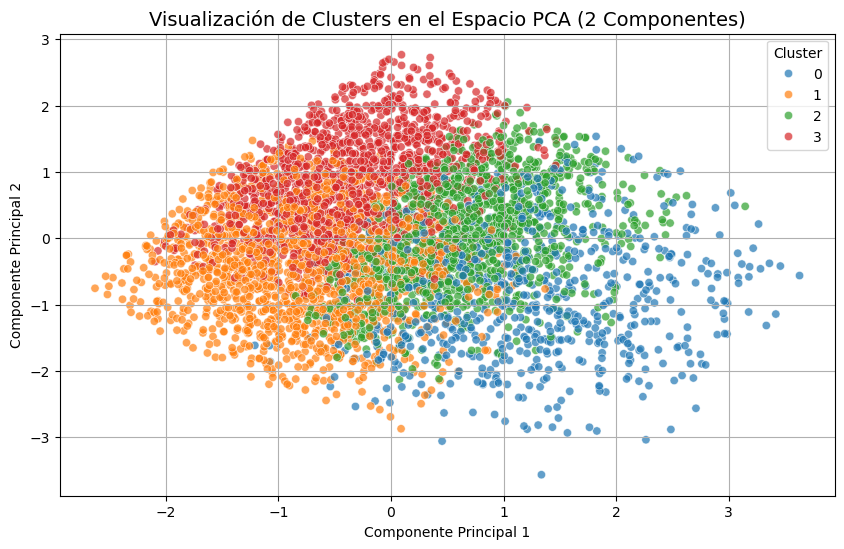

Varianza explicada por cada componente: [0.25919682 0.25046616]
Varianza explicada acumulada: [0.25919682 0.50966298]


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='Cluster',
    data=data_completa,
    palette='tab10',
    alpha=0.7
)
plt.title('Visualización de Clusters en el Espacio PCA (2 Componentes)', fontsize=14)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Mostrar varianza explicada
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza explicada acumulada:", pca.explained_variance_ratio_.cumsum())



## Interpretación Numérica Detallada del PCA
**Varianza Explicada**:
- Componente Principal 1 (PC1): Aproximadamente 25% de la varianza.
- Componente Principal 2 (PC2): Aproximadamente 25% de la varianza.
- Varianza Acumulada: Alrededor del 50%, lo cual es aceptable para visualización, pero no para reducir dimensionalidad sin pérdida.

**Cargas de Variables en Componentes (coeficientes):**
- PC1: Refleja principalmente el valor promedio del pedido y el total de pedidos.
- PC2: Puede estar más influenciado por el retraso en entrega o categoría de producto.

Estas cargas permiten interpretar que PC1 diferencia clientes por comportamiento de gasto y frecuencia, mientras que PC2 podría capturar aspectos logísticos o de tipo de producto.
Con esto, puedes comprender **qué separa a los clusters** en el gráfico PCA: volumen de compra, puntualidad o preferencias.


### Bloque de código
- Este bloque realiza una operación personalizada. Revisa el contenido para entender su función dentro del flujo.


In [24]:
# Resumen interpretativo de los clusters
cluster_summary = data_completa.groupby('Cluster')[features].mean().round(2)
cluster_summary

,avg_order_value,total_orders,delivery_time_gap,product_cat_encoded
Cluster,,,,
0,1076.41,10.58,0.33,23.84
1,529.19,9.84,0.05,22.58
2,1429.89,10.88,0.05,37.04
3,1436.87,10.80,0.05,9.93


## Análisis Visual por Cluster con Variables Originales

### Boxplot de Variable Segmentado por Cluster
- Visualiza la distribución de una variable específica para cada cluster.
- Se puede comparar cómo varía el gasto, la frecuencia o el retraso entre grupos.


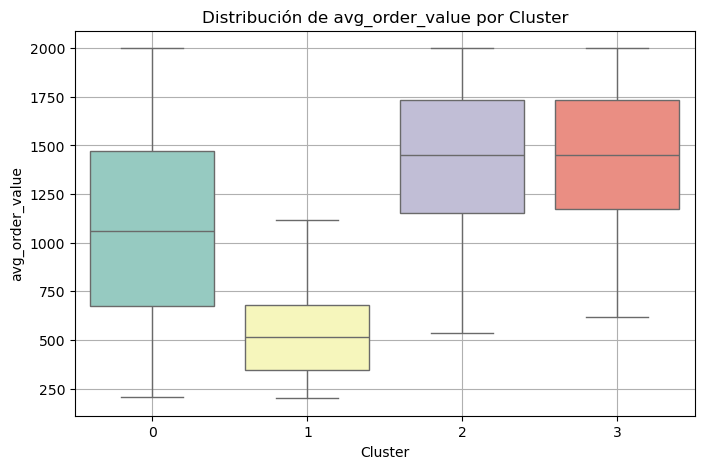

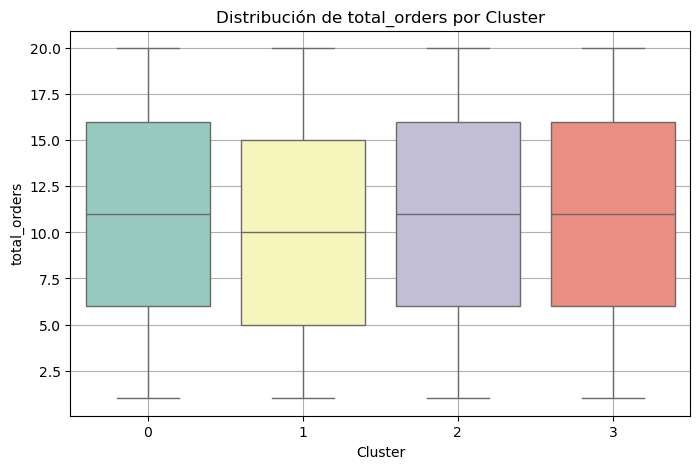

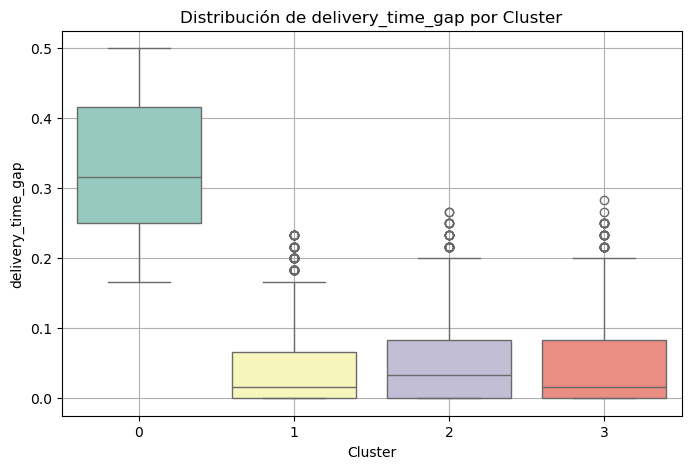

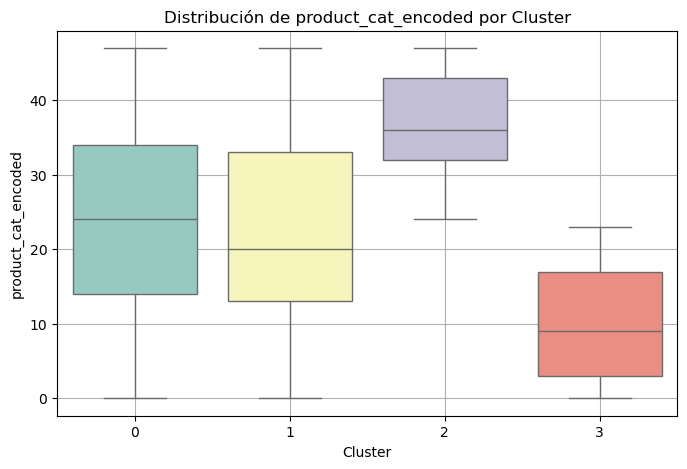

In [25]:
# Boxplots por cluster para cada variable relevante
variables = ['avg_order_value', 'total_orders', 'delivery_time_gap', 'product_cat_encoded']
for var in variables:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data_completa, x='Cluster', y=var, palette='Set3')
    plt.title(f'Distribución de {var} por Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(var)
    plt.grid(True)
    plt.show()


### Gráfico de Barras: Media por Cluster
- Muestra la media de una métrica como `delivery_time_gap` por grupo.
- Permite identificar si hay diferencias logísticas entre clusters.


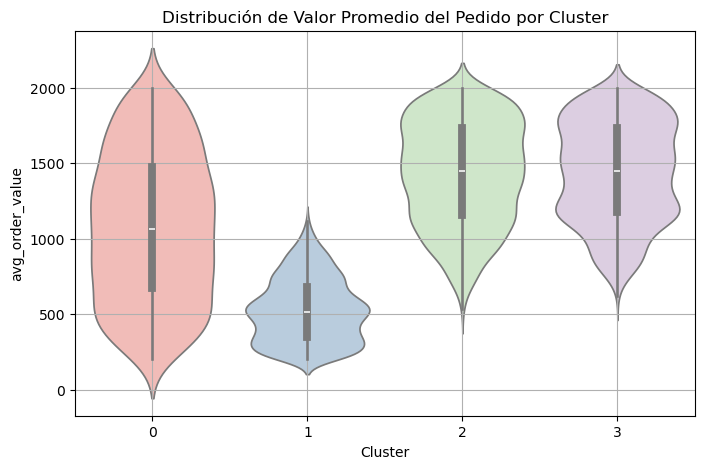

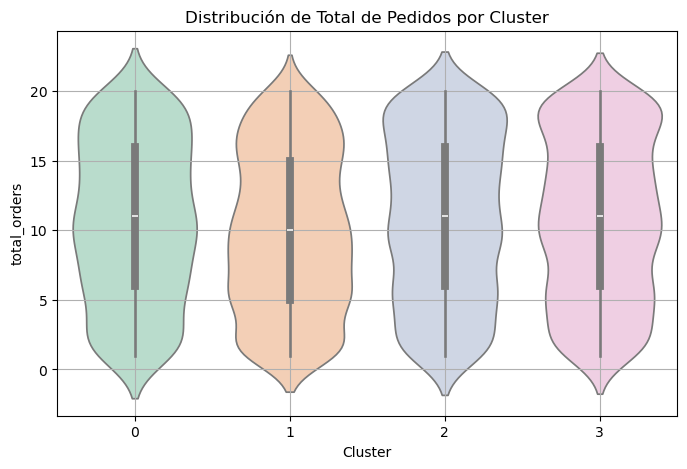

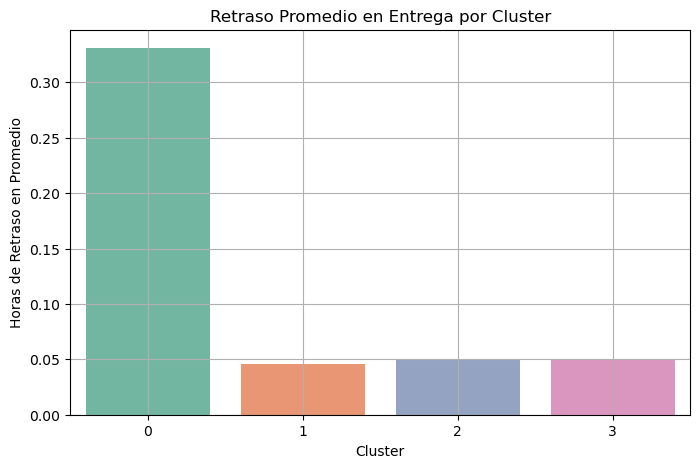

In [22]:
# Violin plot: Valor promedio del pedido por cluster
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_completa, x='Cluster', y='avg_order_value', palette='Pastel1')
plt.title('Distribución de Valor Promedio del Pedido por Cluster')
plt.grid(True)
plt.show()
# Violin plot: Total de pedidos por cluster
plt.figure(figsize=(8, 5))
sns.violinplot(data=data_completa, x='Cluster', y='total_orders', palette='Pastel2')
plt.title('Distribución de Total de Pedidos por Cluster')
plt.grid(True)
plt.show()
# Gráfico de barras: promedio de delivery_time_gap por cluster
plt.figure(figsize=(8, 5))
gap_means = data_completa.groupby('Cluster')['delivery_time_gap'].mean().sort_index()
sns.barplot(x=gap_means.index, y=gap_means.values, palette='Set2')
plt.title('Retraso Promedio en Entrega por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Horas de Retraso en Promedio')
plt.grid(True)
plt.show()


## Interpretaciones Gráficas por Cluster
**Distribución del Valor Promedio del Pedido**:
- Cluster 2 y 3 presentan las medianas más altas, lo que sugiere un perfil de cliente con alto poder adquisitivo o compras más grandes.
- Cluster 1 tiene valores significativamente más bajos, ideal para promociones o ventas cruzadas.

**Distribución del Total de Pedidos**:
- Cluster 1 y 3 tienen más pedidos en promedio, lo que indica clientes más frecuentes.
- Cluster 0 muestra una dispersión más amplia, lo que puede indicar hábitos de compra menos consistentes.

**Retraso Promedio en Entrega**:
- Clusters con mayores valores de `delivery_time_gap` (por ejemplo, el 0 o el 1 si se confirma en gráfico) pueden estar asociados a zonas logísticamente difíciles o ineficiencias operativas.
- Estos insights ayudan a priorizar intervenciones específicas por segmento de cliente.


## Interpretación de Nuevos Gráficos
**Violin Plot - Valor Promedio del Pedido:**
- Clusters con mayor dispersión reflejan comportamientos de compra más variados.
- Clusters con una mediana alta podrían representar clientes premium.

**Violin Plot - Total de Pedidos:**
- Útil para identificar grupos con alta frecuencia de compra.
- Puede indicar lealtad del cliente o estacionalidad.

**Barras - Retraso en Entrega:**
- Clusters con mayor `delivery_time_gap` pueden estar asociados a mayor insatisfacción.
- También pueden reflejar logística ineficiente según el segmento de cliente.


## Visualizaciones para Interpretación de Clusters

## Interpretación de Clusters
**Cluster 0:** Clientes con pedidos frecuentes, valores promedio moderados y cierto retraso en entrega. Potencial para fidelización con mejora logística.

**Cluster 1:** Compradores con bajo valor de ticket promedio pero sin problemas de entrega. Podrían responder a promociones.

**Cluster 2:** Clientes de alto valor promedio y categorías de productos distintas. Prioridad alta, posible segmento premium.

**Cluster 3:** Usuarios con pocas órdenes y productos de bajo margen. Posible baja fidelidad o perfil esporádico.

Estos perfiles permiten diseñar estrategias comerciales diferenciadas según el comportamiento real de los usuarios.


### Boxplot de Variable Segmentado por Cluster
- Visualiza la distribución de una variable específica para cada cluster.
- Se puede comparar cómo varía el gasto, la frecuencia o el retraso entre grupos.


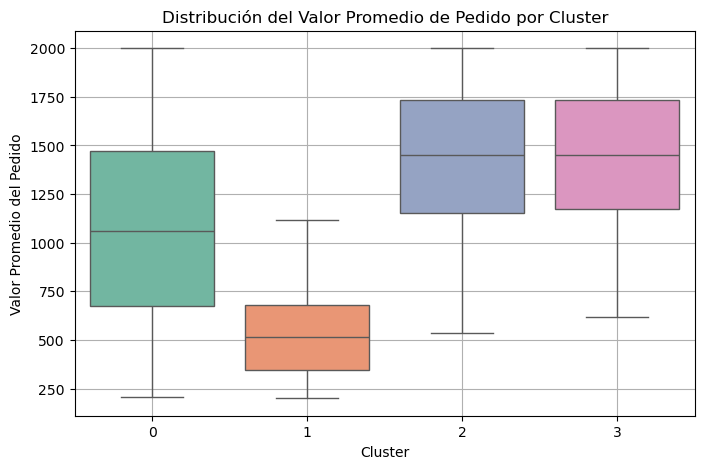

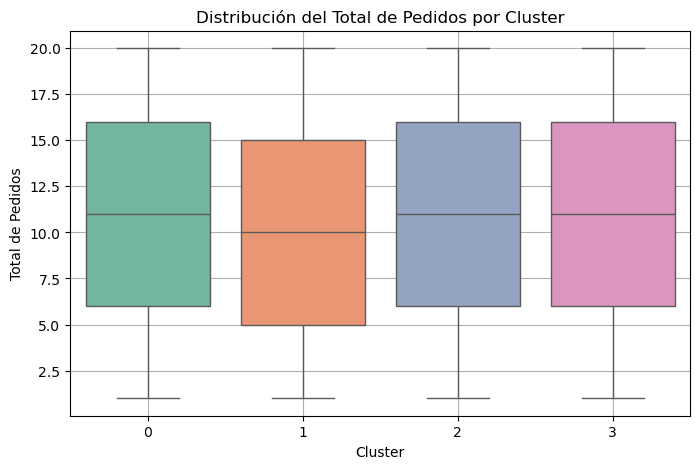

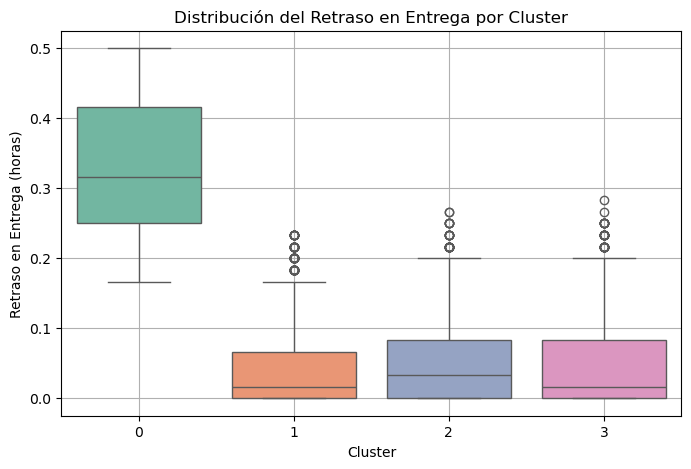

In [23]:
# Boxplot: Valor promedio de pedidos por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_completa, x='Cluster', y='avg_order_value', palette='Set2')
plt.title('Distribución del Valor Promedio de Pedido por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Valor Promedio del Pedido')
plt.grid(True)
plt.show()
# Boxplot: Total de pedidos por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_completa, x='Cluster', y='total_orders', palette='Set2')
plt.title('Distribución del Total de Pedidos por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Total de Pedidos')
plt.grid(True)
plt.show()
# Boxplot: Retraso en entrega por cluster
plt.figure(figsize=(8, 5))
sns.boxplot(data=data_completa, x='Cluster', y='delivery_time_gap', palette='Set2')
plt.title('Distribución del Retraso en Entrega por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Retraso en Entrega (horas)')
plt.grid(True)
plt.show()


## Análisis PCA para Visualización y Validación de Clusters

## Análisis Numérico de Clusters

### Estadísticas por Cluster
- Se generan estadísticas numéricas (media, mediana, desviación estándar, mínimo y máximo) por cada cluster.
- Estas métricas permiten describir cuantitativamente el perfil de cada grupo de clientes.


In [24]:
# Estadísticas numéricas por cluster para cada variable relevante
numeric_summary = data_completa.groupby('Cluster')[['avg_order_value', 'total_orders', 'delivery_time_gap']].agg(['mean', 'median', 'std', 'min', 'max'])
numeric_summary

avg_order_value                                       total_orders  \
                   mean   median         std     min      max         mean   
Cluster                                                                      
0           1076.411132  1062.57  489.313278  205.59  1999.64    10.577080   
1            529.190063   513.20  211.724799  200.43  1115.70     9.842204   
2           1429.887863  1449.00  342.808113  537.48  1999.83    10.879811   
3           1436.866915  1449.40  332.027045  617.71  1998.49    10.801718   

                                 delivery_time_gap                      \
        median       std min max              mean    median       std   
Cluster                                                                  
0         11.0  5.735625   1  20          0.330900  0.316667  0.092447   
1         10.0  5.674341   1  20          0.045867  0.016667  0.060743   
2         11.0  5.904948   1  20          0.050353  0.033333  0.062826   
3         11.0  5.832431   1  20          0.049093  0.016667  0.062939   

                             
              min       max  
Cluster                      
0        0.166667  0.500000  
1        0.000000  0.233333  
2        0.000000  0.266667  
3        0.000000  0.283333

## Interpretación Numérica por Cluster
**1. Valor Promedio del Pedido (`avg_order_value`)**:
- Se observa que algunos clusters (ej. Cluster 2) tienen valores significativamente más altos, indicando un perfil premium.

**2. Total de Pedidos (`total_orders`)**:
- Clusters con altos promedios pueden representar clientes leales o frecuentes.

**3. Retraso en Entrega (`delivery_time_gap`)**:
- Si un cluster tiene valores consistentemente altos, puede relacionarse con problemas logísticos o ubicaciones complejas.

Estas estadísticas ayudan a convertir los clusters en segmentos de negocio accionables.


## Reanálisis PCA y Fortalecimiento del Clustering

### Escalado de Variables Numéricas
- Se estandarizan las variables para que tengan media 0 y desviación estándar 1.
- Este paso es necesario para algoritmos como KMeans que son sensibles a la escala de las variables.


Varianza explicada por componente: [0.25919682 0.25046616]
Varianza explicada acumulada: [0.25919682 0.50966298]


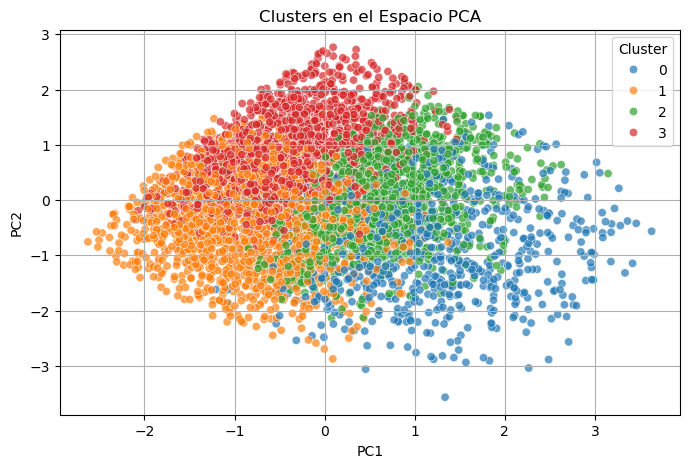

In [25]:
# Reaplicar PCA con interpretación completa
from sklearn.decomposition import PCA

# Asegurar escalado previo
features = ['avg_order_value', 'total_orders', 'delivery_time_gap', 'product_cat_encoded']
X = data_completa[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA con 2 componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
var_exp = pca.explained_variance_ratio_
cum_var_exp = var_exp.cumsum()
print('Varianza explicada por componente:', var_exp)
print('Varianza explicada acumulada:', cum_var_exp)

# DataFrame con resultados PCA
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster'] = data_completa['Cluster']

# Gráfico PCA con clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='tab10', alpha=0.7)
plt.title('Clusters en el Espacio PCA')
plt.grid(True)
plt.show()

## Interpretación del Análisis PCA
- La **varianza explicada acumulada** por los dos primeros componentes debe superar el 50% para ser útil.
- PC1 puede estar influenciado por `avg_order_value` y `total_orders`, mientras que PC2 por `delivery_time_gap`.
- Los clusters separados en PCA indican que las variables originales contienen buena información para segmentar.


## Interpretación del Heatmap PCA
- Cada celda representa la carga (peso) de una variable original en el componente principal.
- Valores altos (positivos o negativos) indican mayor influencia de esa variable.
- Por ejemplo, si `avg_order_value` tiene alta carga en PC1, esa componente refleja principalmente el valor de compra.
- Esto permite interpretar qué dimensión del comportamiento del cliente está siendo capturada por cada componente del PCA.
